&nbsp;

# 4. Optimization 
Optimization is the process of finding the best combination of hyperparameters that minimize your loss function. Optimizing your machine learning algorithms is an important step when making predictions because not every machine learning problem is the same and in comparison, not every solution will be appropriate. Finding the best hyperparameters for your specific solution will ensure that your model will be optimized to your specific problem and will accurately make predictions with a more robust mapping function. 

In [1]:
# Standard libraries. 
import pandas as pd
import numpy as np 
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Importing our functions. 
import functions
import plot_functions

# Importing chosen models. 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Importing transformers. 
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.decomposition import PCA

# Renders plotly figs into svg static images. 
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
root = os.getcwd() # Set up root directory.
df = pd.read_csv(r"{}\train.csv".format(root)) # Import train data. 
df = df.set_index("id") # Set paitent id as index. 

X = df.iloc[:,:-1] # Splitting features and labels. 
y = df.iloc[:,-1]

df.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
896864,12.98,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.02950,0.1761,0.06540,...,21.95,99.21,634.3,0.1288,0.32530,0.34390,0.09858,0.3596,0.09166,0
89382601,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,...,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695,0


&nbsp;

### Section A: Grid Search Cross Validation
Grid Search Cross Validation is a hyperparameter tuning technique where the user specifies a "parameter grid" (A list of parameters provided with the values they want to test) then evaluates each and every combination using cross validation before outputting the best feature combination for your algorithm. 

**A.1: Gradient Boosting Classifier**<br>
Recall from the previous section that a normalized dataset worked the best with our Gradient Boosting Classifier, so the first step is to rescale our raw data, then implement the grid search algorithm.

In [3]:
n = Normalizer() # Creating our normalizer instance. 
normalizedData = n.fit_transform(X) # Transforming our feature space. 
dfNormalized = pd.DataFrame(data=normalizedData, columns=list(X.columns)) # Output results into a dataframe. 
dfNormalized.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.015681,0.023376,0.102107,0.620954,0.000116,0.000136,0.000086,0.000036,0.000213,0.000079,...,0.017421,0.026517,0.119854,0.766286,0.000156,0.000393,0.000415,0.000119,0.000434,0.000111
1,0.013505,0.014503,0.085667,0.614589,0.000070,0.000032,0.000013,0.000017,0.000151,0.000049,...,0.015215,0.020104,0.095853,0.777179,0.000093,0.000066,0.000044,0.000054,0.000234,0.000053


In [4]:
# Creating our class instance for our GBR. 
GBC_gs = functions.model_evaluation() 

# Adding parameter grid. 
GBC_gs.add_params_component('n_estimators', [50, 250, 500])
GBC_gs.add_params_component('min_samples_split', [2, 30, 50])
GBC_gs.add_params_component('max_depth', [2, 20, 50])
GBC_gs.add_params_component('learning_rate', [0.1, 0.01, 0.001])
# Evaluate using grid search. 
GBC_gs.grid_search(dfNormalized, y, GradientBoostingClassifier())

Best: 0.973626 using {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 30, 'n_estimators': 500}


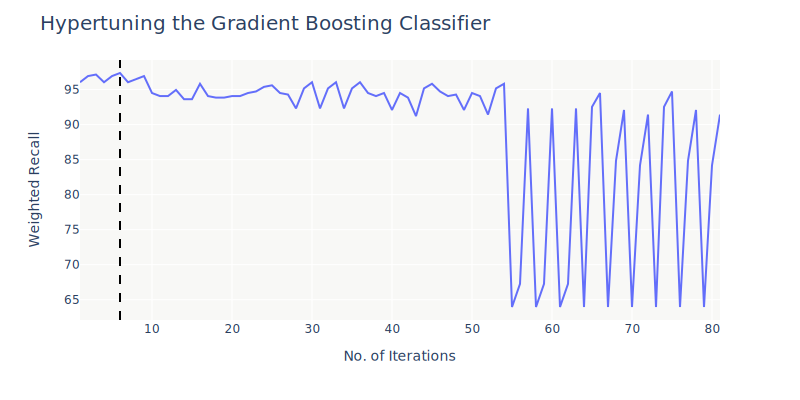

In [5]:
# Plotting Results.
plot_functions.grid_search_plot(GBC_gs, "Gradient Boosting Classifier")

**A.2: Random Forest Classifier**<br>
The next step is to implement grid search on our base Random Forest Classifier using our original X features.

In [6]:
# Creating our class instance for RFR. 
RFC_gs = functions.model_evaluation()

# Adding parameter grid.
RFC_gs.add_params_component('n_estimators', [50, 250, 500])
RFC_gs.add_params_component('min_samples_split', [2, 30, 50])
RFC_gs.add_params_component('min_samples_leaf', [2, 10, 25])
RFC_gs.add_params_component('max_depth', [2, 20, 50])
# Evaluate using grid search. 
RFC_gs.grid_search(X, y, RandomForestClassifier())

Best: 0.956044 using {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


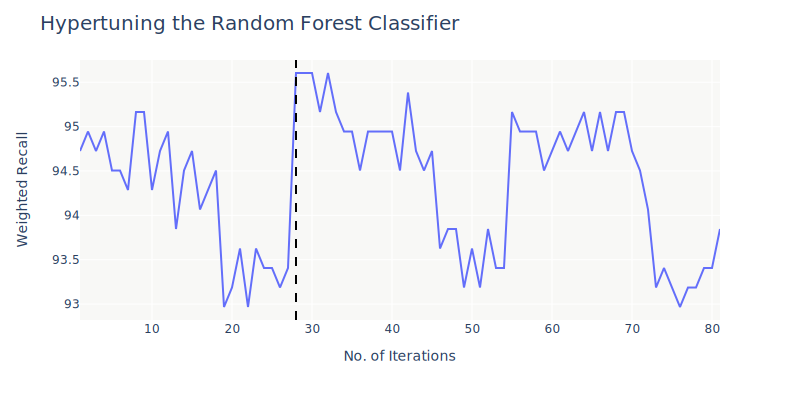

In [7]:
# Plotting results. 
plot_functions.grid_search_plot(RFC_gs, "Random Forest Classifier")

**A.3: XGB Classifier**<br>
Finally, we can implement grid search on our XGB Classifier using our normalized dataset.

In [8]:
# Creating our class instance for RFR. 
XGB_gs = functions.model_evaluation()

# Adding parameter grid.
XGB_gs.add_params_component('n_estimators', [50, 250, 500])
XGB_gs.add_params_component('min_child_weight', [1, 5, 15])
XGB_gs.add_params_component('max_depth', [2, 20, 50])
XGB_gs.add_params_component('learning_rate', [0.1, 0.01, 0.001])
# Evaluate using grid search. 
XGB_gs.grid_search(dfNormalized, y, XGBClassifier())

Best: 0.967033 using {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 250}


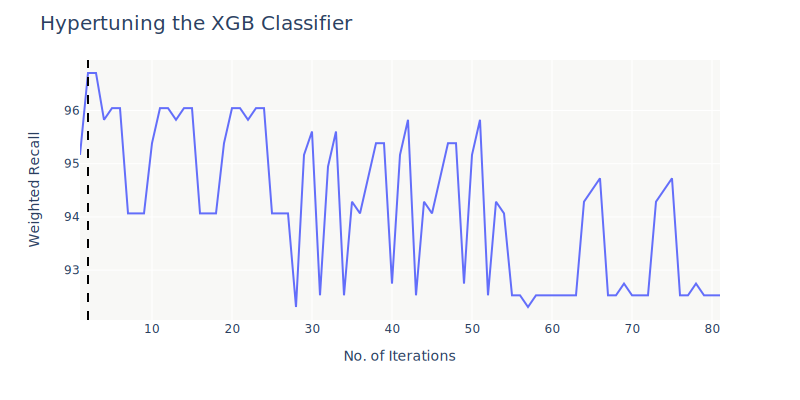

In [9]:
# Plotting results. 
plot_functions.grid_search_plot(XGB_gs, "XGB Classifier")

**A.4: Conclusion**<br>
In conclusion our dataset is small enough to process quickly without the need to dimensionality reduction. In terms of the grid search algorithm our Gradient Boosting Regressor scored the best result with a score of 97.14% followed by our XGB Regressor with a score of 96.70% and finally our Random Forest with a score of 95.06%.

&nbsp;

| Model | GridSearch CV Score | Final Model | 
|---------|---------|---------|
| **Gradient Boosting Classifier** |97.14% |GradientBoostingClassifier(learning_rate=0.1, max_depth=2, min_samples_split=30, n_estimators=500) | 
| **Random Forest Classifier** |95.06% |RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=250) | 
| **XGB Classifier** |96.70% |XGBClassifier(learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=250) | 

&nbsp;

&nbsp;
**Author:** Aaron Chew&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Date Published:** 11/08/2022 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Email:** aaronsamuelchew@gmail.com &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **GitHub:** https://github.com/aaron-chew  